# Segmentação de Imagens

In [18]:
import cv2
import glob
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown
from ntpath import join

In [19]:
def open_img(image_path):
    """
            Funcao responsavel por carregar imagens de um diretorio
            Arguments:
              image_path: Caminho do diretorio das imagens
            Return:
              dataset: Vetor, onde cada posição possui uma imagem carregada do diretório
        """
    dataset = []
    #carrega as imagens do diretorio
    for i in glob.glob(image_path + '/*.png', recursive=True):
        dataset.append(cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB))
    for j in glob.glob(image_path + '/*.jpg', recursive=True):
        dataset.append(cv2.cvtColor(cv2.imread(j), cv2.COLOR_BGR2RGB))

    return dataset

def show(pos,image,title):
  plt.subplot(pos)
  plt.imshow(image)
  plt.title(title)
  plt.axis('off')

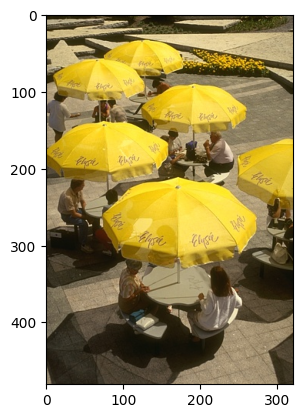

In [20]:
dataset = open_img('imagens')
image = dataset[0].copy()
plt.imshow(image,cmap='gray')

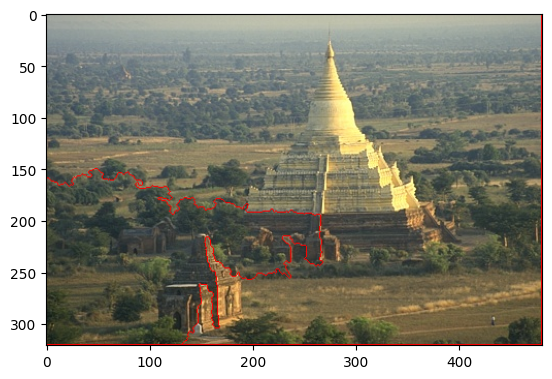

In [4]:
def watershed(image): 
    image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0

    markers = cv2.watershed(image,markers)
    image[markers == -1] = [255,0,0]
    return image
plt.imshow(watershed(dataset[5]))

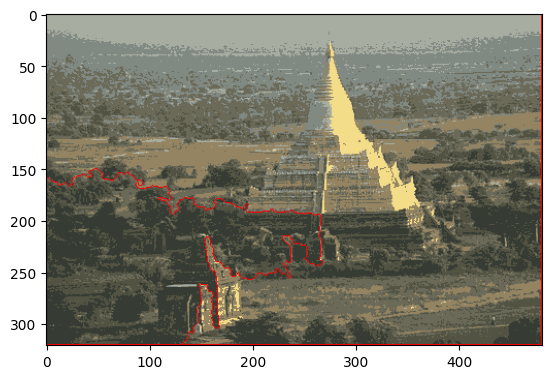

In [16]:
def kmeans(image,K):
    Z = image.reshape((-1,3))
    shape = image.shape
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    image = center[label.flatten()]
    image = image.reshape((shape))
    return image
plt.imshow(kmeans(dataset[5],8))

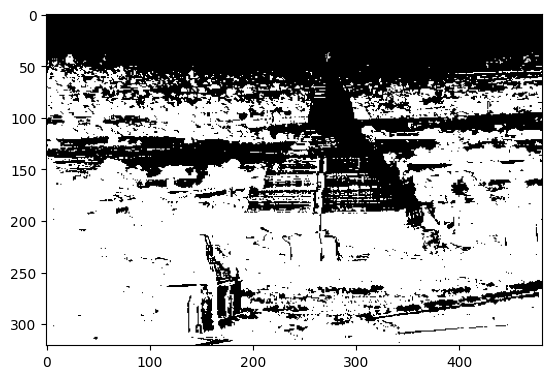

In [28]:
def otsu(image):
    image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return thresh 
    
plt.imshow(otsu(dataset[5]),cmap='gray')